(768, 9)
preg       int64
plas       int64
pres       int64
skin       int64
test       int64
mass     float64
pedi     float64
age        int64
class      int64
dtype: object
             preg        plas        pres        skin        test        mass  \
count  768.000000  768.000000  768.000000  768.000000  768.000000  768.000000   
mean     3.845052  120.894531   69.105469   20.536458   79.799479   31.992578   
std      3.369578   31.972618   19.355807   15.952218  115.244002    7.884160   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      1.000000   99.000000   62.000000    0.000000    0.000000   27.300000   
50%      3.000000  117.000000   72.000000   23.000000   30.500000   32.000000   
75%      6.000000  140.250000   80.000000   32.000000  127.250000   36.600000   
max     17.000000  199.000000  122.000000   99.000000  846.000000   67.100000   

             pedi         age       class  
count  768.000000  768.000000  768.000000  
mean  

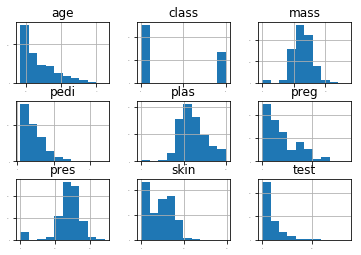

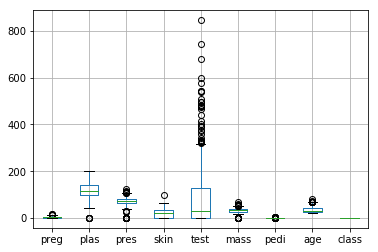

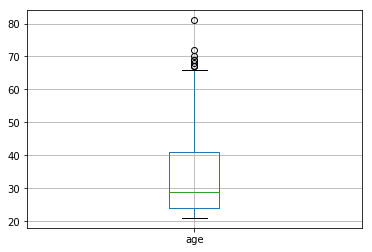

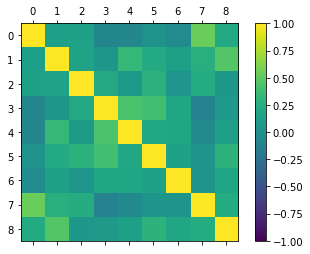

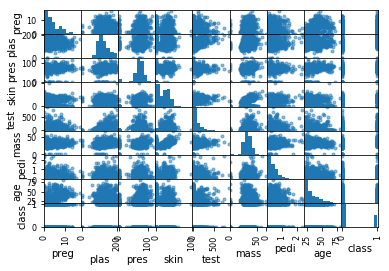

preg     0
plas     0
pres     0
skin     0
test     0
mass     0
pedi     0
age      0
class    0
dtype: int64
Explained Variance [ 0.88854663  0.06159078  0.02579012]
Components [[ -2.02176587e-03   9.78115765e-02   1.60930503e-02   6.07566861e-02
    9.93110844e-01   1.40108085e-02   5.37167919e-04  -3.56474430e-03]
 [ -2.26488861e-02  -9.72210040e-01  -1.41909330e-01   5.78614699e-02
    9.46266913e-02  -4.69729766e-02  -8.16804621e-04  -1.40168181e-01]
 [ -2.24649003e-02   1.43428710e-01  -9.22467192e-01  -3.07013055e-01
    2.09773019e-02  -1.32444542e-01  -6.39983017e-04  -1.25454310e-01]]
Model Importance using Extra Classifier [ 0.11758417  0.2143682   0.09594027  0.07205692  0.07756897  0.14786381
  0.13010757  0.14451009]
Model Importance using Random Forest [ 0.08010678  0.25969644  0.07744678  0.0790924   0.05914882  0.17247576
  0.14286451  0.12916852]
Model coefficents are :  [[  1.21345046e-01   2.59648797e-02  -1.98324567e-02   3.95390687e-03
   -7.04989081e-04   5.557

C:\Anaconda3\envs\python36\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [1]:
import pandas as pd

filename='C:\\Users\\akoguab\\Desktop\\R and D\\Data science\\data set\\pimas.csv'
names= ['preg', 'plas', 'pres', 'skin', 'test','mass', 'pedi','age','class']

dataset=pd.read_csv(filename,names=names)

# First 20 rows of your data

dataset.head(20)

# dimensions of your data

print(dataset.shape)

# datatype for each attribute

print(dataset.dtypes)

# Summary Statistics

print(dataset.describe())

#Summary Statisitics of the ge variable

print(dataset.age.describe())


# Class Distribution. For categorical data only

print(dataset.groupby('class').size())

temp1=dataset['class'].value_counts(ascending=True)
print(temp1)


# Correlations between attributes

correlations= dataset.corr(method='pearson')
print(correlations)


# skew for each attribute

print(dataset.skew())



# Understanding your data by Visulation

#Histogram

import matplotlib.pyplot as plt 

dataset.hist(sharex=False, sharey=False, xlabelsize=1, ylabelsize=1)
plt.show()


# Box Plots

dataset.boxplot(ax=None, return_type='axes')
plt.show()

# Box plots of age

dataset.boxplot(column='age',  ax=None, return_type='axes')
plt.show()


#Correlation Matrix Plot

fig = plt.figure() 
ax = fig.add_subplot(111) 
cax = ax.matshow(dataset.corr(), vmin=-1, vmax=1, interpolation='none') 
fig.colorbar(cax) 
plt.show()


#Scatter Plot Matrix


pd.scatter_matrix(dataset)
plt.show()

print(dataset.apply(lambda x: sum(x.isnull()),axis=0))

# Dimensionality Reduction

# Principal Component Analysis

from sklearn.decomposition import PCA

array=dataset.values
X=array[:,0:8]
Y=array[:,8]
pca=PCA(n_components=3)
fit=pca.fit(X)

#Summarize compoenents
print("Explained Variance",fit.explained_variance_ratio_)
print("Components",fit.components_)


#Feature Importance with Extra Trees Classifier
#from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
model=ExtraTreesClassifier()
model.fit(X,Y)

# Print Feature Importance with Extra Tree Classifier

print("Model Importance using Extra Classifier",model.feature_importances_)


#Feature Importance with Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier
model2=RandomForestClassifier()
model2.fit(X,Y)

# Print Feature Importance

print("Model Importance using Random Forest",model2.feature_importances_)




# Model Validation

# Split into training and validation and fit Logistic Regression

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

test_size=0.3
seed=7

X_train,X_test,Y_train,Y_test=train_test_split(X,Y, test_size=test_size,random_state=seed)

#print ("Train data shape:", train.shape)
#print ("Test data shape:", test.shape)
model=LogisticRegression()
model.fit(X_train,Y_train)

# Print model coefficients

print('Model coefficents are : ',model.coef_)

# Score the validation/test data set
resultTest=model.score(X_test,Y_test)
resultTrain=model.score(X_train,Y_train)

print("Accuracy on test data using logistic Regression", resultTest*100, "%")
print("Accuracy on train data using logistic Regression", resultTrain*100, "%")


# Create confusion matrix on the tes data 

# Make predictions on the test data

from sklearn.metrics import confusion_matrix

predicted=model.predict(X_test)
matrix=confusion_matrix(Y_test,predicted)
print(matrix)



# Print Classification Report


from sklearn.metrics import classification_report

report=classification_report(Y_test, predicted) 

print(report)




model=RandomForestClassifier()
model.fit(X_train,Y_train)

# Print model coefficients

#print(model.coef_)

# Score the validation/test data set
resultTest=model.score(X_test,Y_test)
resultTrain=model.score(X_train,Y_train)

print("Accuracy on test data using RF", resultTest*100, "%")
print("Accuracy on train data using RF", resultTrain*100, "%")


# Create confusion matrix on the tes data 

# Make predictions on the test data

from sklearn.metrics import confusion_matrix

predicted=model.predict(X_test)
matrix=confusion_matrix(Y_test,predicted)
print("Confusion Matrix using RF",matrix)



# Print Classification Report


from sklearn.metrics import classification_report

report=classification_report(Y_test, predicted) 

print("Report using RF",report)



#from sklearn.lda import LDA

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 

#model=LDA()

model=LinearDiscriminantAnalysis()
model.fit(X_train,Y_train)

# Print model coefficients

#print(model.coef_)

# Score the validation/test data set
resultTest=model.score(X_test,Y_test)
resultTrain=model.score(X_train,Y_train)

print("Accuracy on test data using LDA", resultTest*100, "%")
print("Accuracy on train data using LDA", resultTrain*100, "%")



# Create confusion matrix on the tes data 

# Make predictions on the test data

from sklearn.metrics import confusion_matrix

predicted=model.predict(X_test)
matrix=confusion_matrix(Y_test,predicted)
print("Confusion Matrix using RF",matrix)



# Print Classification Report


from sklearn.metrics import classification_report

report=classification_report(Y_test, predicted) 

print("Report using RF",report)


# Fit Decision Tree Model

from sklearn.tree import DecisionTreeClassifier, export_graphviz
    
        
model= DecisionTreeClassifier()
model.fit(X_train,Y_train)

# Print model coefficients

#print(model.coef_)

# Score the validation/test data set
resultTest=model.score(X_test,Y_test)
resultTrain=model.score(X_train,Y_train)

print("Accuracy on test data using Descison Trees", resultTest*100, "%")
print("Accuracy on train data using Descision Trees", resultTrain*100, "%")


# Create confusion matrix on the tes data 

# Make predictions on the test data

from sklearn.metrics import confusion_matrix

predicted=model.predict(X_test)
matrix=confusion_matrix(Y_test,predicted)
print("Confusion Matrix using Decision Tree",matrix)



# Print Classification Report


from sklearn.metrics import classification_report

report=classification_report(Y_test, predicted) 

print("Report using Decision Tree",report)


# Fit Linear Dsicriminant Analysis

#from sklearn.lda import LDA
#from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 

from sklearn.svm import SVC
    
model= SVC()
model.fit(X_train,Y_train)

# Print model coefficients

#print(model.coef_)

# Score the validation/test data set
resultTest=model.score(X_test,Y_test)
resultTrain=model.score(X_train,Y_train)

print("Accuracy on test data using SVM", resultTest*100, "%")
print("Accuracy on train data using SVM", resultTrain*100, "%")


# Create confusion matrix on the tes data 

# Make predictions on the test data

from sklearn.metrics import confusion_matrix

predicted=model.predict(X_test)
matrix=confusion_matrix(Y_test,predicted)
print("Confusion Matrix using SVM",matrix)



# Print Classification Report


from sklearn.metrics import classification_report

report=classification_report(Y_test, predicted) 

print("Report using SVM",report)














##BOSTON HOUSING DATA SET-REGRESSION

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  PRICE  
0     15.3  396.90   4.98   24.0  
1     17.8  396.90   9.14   21.6  
2     17.8  392.83   4.03   34.7  
3     18.7  394.63   2.94   33.4  
4     18.7  396.90   5.33   36.2  
(506, 14)
CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
PRICE      float64
dtype: object
             CRIM          ZN       INDUS        CHAS        

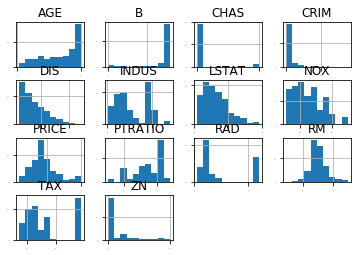

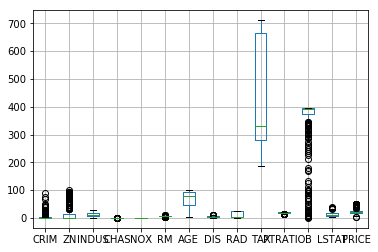

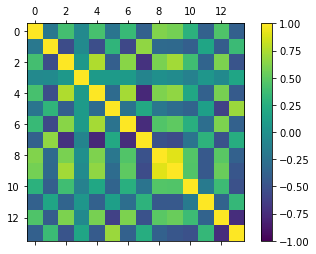

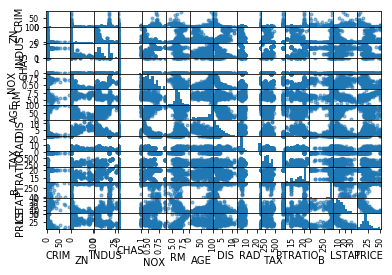

Skew for AGE is: -0.598962639881


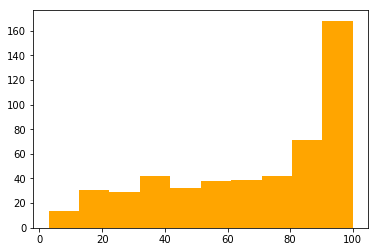

Skew for AGE after log transform  is: -1.67565504382


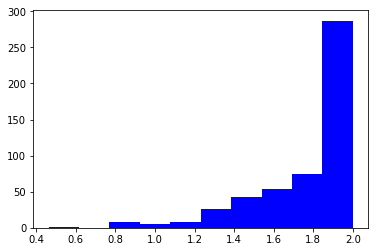

Skew for DIS is: 1.0117805793


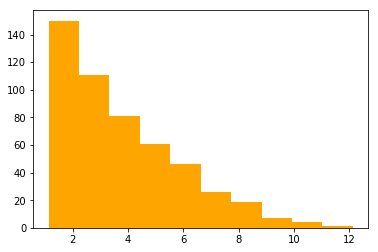

Skew for DIS after log transform is: 0.152730131811


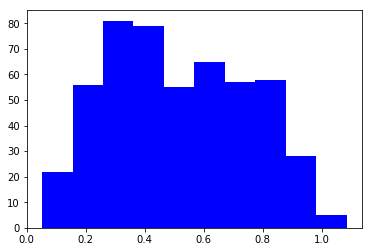

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null category
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
PRICE      506 non-null float64
dtypes: category(1), float64(13)
memory usage: 52.0 KB
(354, 14)
(152, 14)
[ -1.60490651e-01   2.44096905e-02  -5.62732838e-02   3.03555299e+00
  -2.41748118e+01   4.27670651e+00  -1.99349612e+00  -1.84080260e+01
   3.33696010e-01  -1.53200521e-02  -9.31530288e-01   8.57727334e-03
  -4.61033808e-01]
Linear Regression RMSE :  5.1100862347
[ -5.85850543e-02   1.63531375e-03   0.00000000e+00   0.00000000e+00
   0.00000000e+00   1.85288452e+00   

In [17]:
from sklearn import datasets

import pandas as pd

import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeClassifier

from sklearn.linear_model import ElasticNet
from sklearn import svm
from sklearn.metrics import mean_squared_error

boston=datasets.load_boston()



dataset = pd.DataFrame(boston.data)
#print(dataset.head())

dataset.columns = boston.feature_names
#print(dataset.head())


dataset['PRICE'] = boston.target
print(dataset.head())

print(dataset.shape)

# datatype for each attribute

print(dataset.dtypes)

# Summary Statistics

print(dataset.describe())

import matplotlib.pyplot as plt 

dataset.hist(sharex=False, sharey=False, xlabelsize=1, ylabelsize=1)
plt.show()


# Box Plots

dataset.boxplot(ax=None, return_type='axes')
plt.show()


#Correlation Matrix Plot

fig = plt.figure() 
ax = fig.add_subplot(111) 
cax = ax.matshow(dataset.corr(), vmin=-1, vmax=1, interpolation='none') 
fig.colorbar(cax) 
plt.show()


#Scatter Plot Matrix


pd.scatter_matrix(dataset)
plt.show()


# Show the skewness for age variable

print ("Skew for AGE is:", dataset.AGE.skew())
plt.hist(dataset.AGE, color='orange')
plt.show()

# Log Transform the age variable for skewness
dataset.AGE = np.log10(dataset.AGE)
print ("Skew for AGE after log transform  is:", dataset.AGE.skew())
plt.hist(dataset.AGE, color='blue')
plt.show()


# Show the skewness for age variable

print ("Skew for DIS is:", dataset.DIS.skew())
plt.hist(dataset.DIS, color='orange')
plt.show()

# Log Transform the age and DIS variable for skewness
dataset.DIS = np.log10(dataset.DIS)
print ("Skew for DIS after log transform is:", dataset.DIS.skew())
plt.hist(dataset.DIS, color='blue')
plt.show()




# Change all categorical variables to type category

    
for col in ['CHAS']:
        dataset[col] = dataset[col].astype('category')


dataset.info()

# Encode category variable for scikitlearn to process

from sklearn.preprocessing import LabelEncoder
var_cat = ['CHAS']
le = LabelEncoder()
for i in var_cat:
    dataset[i] = le.fit_transform(dataset[i])
dataset.dtypes 

from sklearn.cross_validation import train_test_split

    # Generate the training set.  Set random_state to be able to replicate results.

train = dataset.sample(frac=0.7, random_state=1)

# Select anything not in the training set and put it in the testing/validation set.

test = dataset.loc[~dataset.index.isin(train.index)]
# Print the shapes of both sets.
print(train.shape)
print(test.shape)


# Get all the columns from the dataframe for the training data.
columnsTrain= train.columns.tolist()
columnsTrain=columnsTrain[0:13]

columnsTest= test.columns.tolist()
columnsTest=columnsTest[0:13]

target= 'PRICE'


# Fit Linear Regression

model = LinearRegression ()
# Fit the model to the training data.
model.fit(train[columnsTrain], train[target])

print(model.coef_)

# Make predictions on the training data

predictions_train = model.predict(train[columnsTrain])
predictions_test = model.predict(test[columnsTest])

#Print root mean square error
mse_train = mean_squared_error(predictions_test,test[target])


print("Linear Regression RMSE : ",mse_train**0.5)



# Fit LASSO Regression

model = Lasso ()

# Fit the model to the training data.
model.fit(train[columnsTrain], train[target])

print(model.coef_)

# Make predictions on the training data

predictions_train = model.predict(train[columnsTrain])
predictions_test = model.predict(test[columnsTest])

#Print root mean square error
mse_train = mean_squared_error(predictions_test,test[target])


print("LASSO : ",mse_train**0.5)


# Fit Elastic Net Regression on training data

model = ElasticNet ()

# Fit the model to the training data.
model.fit(train[columnsTrain], train[target])

print(model.coef_)

# Make predictions on the training data



predictions_train = model.predict(train[columnsTrain])

predictions_test = model.predict(test[columnsTest])

#Print root mean square error
mse_train = mean_squared_error(predictions_test,test[target])


print("Elastic Net : ",mse_train**0.5)









## IRIS DATA SET-CLASSIFICATION

In [13]:
from sklearn import datasets

import pandas as pd

iris=datasets.load_iris()



dataset = pd.DataFrame(iris.data)
print(dataset.head())

dataset.columns = iris.feature_names

dataset['class'] = iris.target
print(dataset.head())


#dataset['PRICE'] = boston.target
print(dataset.head())

print(dataset.shape)

# datatype for each attribute

print(dataset.dtypes)


# Summary Statistics

print(dataset.describe())


train = dataset.sample(frac=0.7, random_state=1)

# Select anything not in the training set and put it in the testing/validation set.

test = dataset.loc[~dataset.index.isin(train.index)]
# Print the shapes of both sets.
print(train.shape)
print(test.shape)


# Get all the columns from the dataframe for the training data.
columnsTrain= train.columns.tolist()
columnsTrain=columnsTrain[0:4]

columnsTest= test.columns.tolist()
columnsTest=columnsTest[0:4]

target= 'class'


# Fit Linear Regression

model=LogisticRegression()

# Fit the model to the training data.
model.fit(train[columnsTrain], train[target])

predictions_train = model.predict(train[columnsTrain])
predictions_test = model.predict(test[columnsTest])

matrix=confusion_matrix(train[target],predictions_train)
print(matrix)


# Score the validation/test data set
resultTest=model.score(test[columnsTrain],test[target])
resultTrain=model.score(train[columnsTrain],train[target])

print("Accuracy on test data", resultTest*100, "%")
print("Accuracy on train data", resultTrain*100, "%")






     0    1    2    3
0  5.1  3.5  1.4  0.2
1  4.9  3.0  1.4  0.2
2  4.7  3.2  1.3  0.2
3  4.6  3.1  1.5  0.2
4  5.0  3.6  1.4  0.2
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   class  
0      0  
1      0  
2      0  
3      0  
4      0  
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3          

## CARLIFORNIA HOUSING DATA-REGRESSION

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MEDIAN VALUE  
0    -122.23         4.526  
1    -122.22         3.585  
2    -122.24         3.521  
3    -122.25         3.413  
4    -122.25         3.422  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
MedInc          20640 non-null float64
HouseAge        20640 non-null float64
AveRooms        20640 non-null float64
AveBedrms       20640 non-null float64
Population      20640 non-null float64
AveOccup        20640 non-null float64
Latitude        20640 non-n

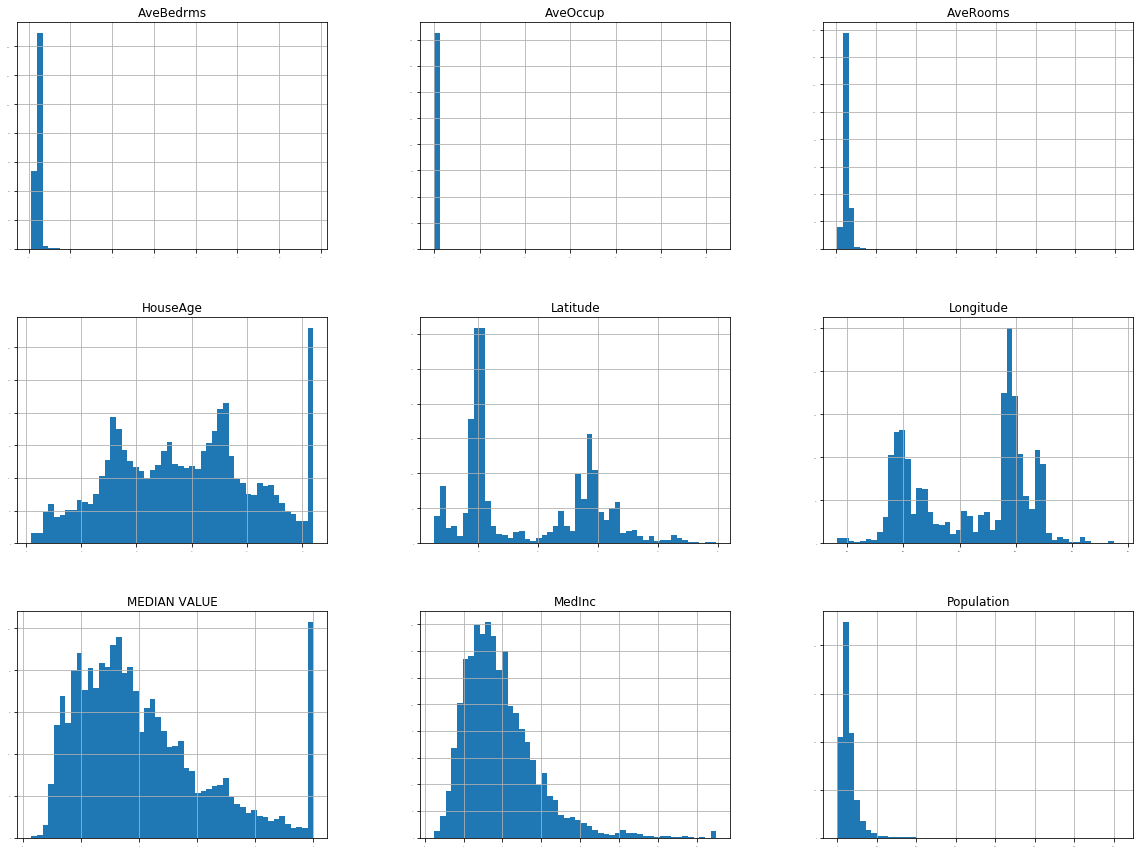

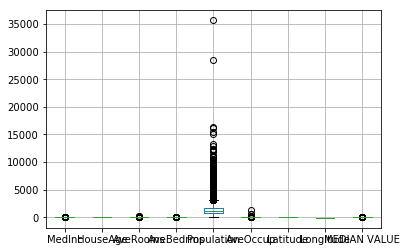

                MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  \
MedInc        1.000000 -0.119034  0.326895  -0.062040    0.004834  0.018766   
HouseAge     -0.119034  1.000000 -0.153277  -0.077747   -0.296244  0.013191   
AveRooms      0.326895 -0.153277  1.000000   0.847621   -0.072213 -0.004852   
AveBedrms    -0.062040 -0.077747  0.847621   1.000000   -0.066197 -0.006181   
Population    0.004834 -0.296244 -0.072213  -0.066197    1.000000  0.069863   
AveOccup      0.018766  0.013191 -0.004852  -0.006181    0.069863  1.000000   
Latitude     -0.079809  0.011173  0.106389   0.069721   -0.108785  0.002366   
Longitude    -0.015176 -0.108197 -0.027540   0.013344    0.099773  0.002476   
MEDIAN VALUE  0.688075  0.105623  0.151948  -0.046701   -0.024650 -0.023737   

              Latitude  Longitude  MEDIAN VALUE  
MedInc       -0.079809  -0.015176      0.688075  
HouseAge      0.011173  -0.108197      0.105623  
AveRooms      0.106389  -0.027540      0.151948  
AveBedrms

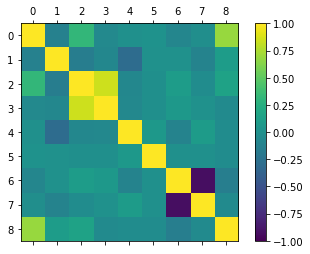

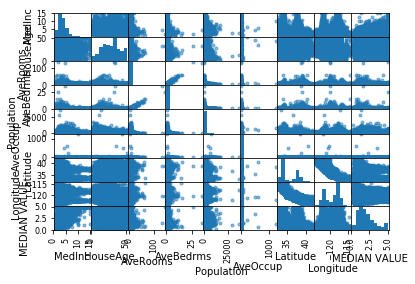

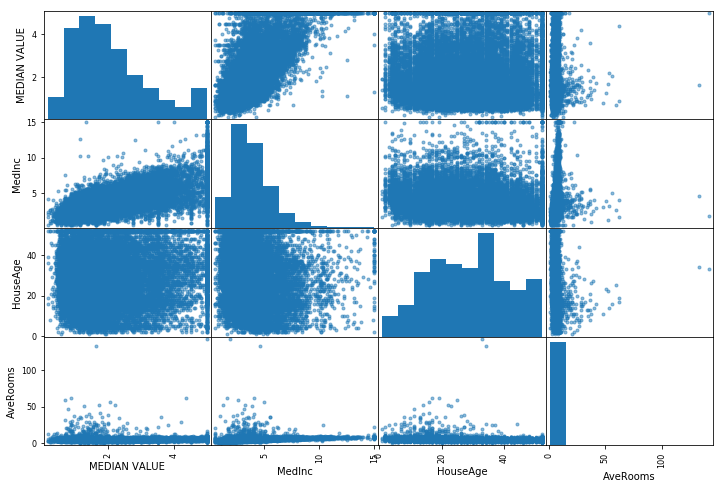

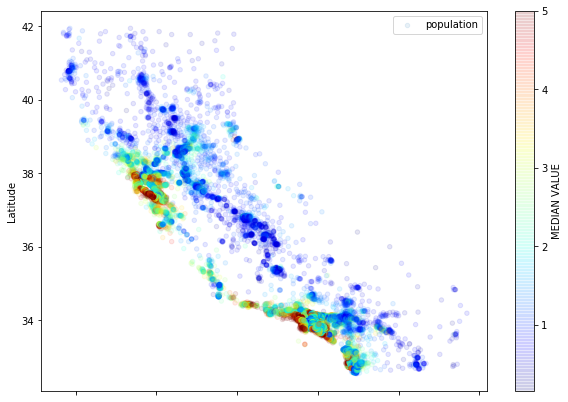

In [2]:
from sklearn import datasets

import pandas as pd


housing=datasets.fetch_california_housing()
dataset = pd.DataFrame(housing.data)
dataset.columns = housing.feature_names
dataset['MEDIAN VALUE'] = housing.target

dataset.to_csv('C:\\Users\\akoguab\\Desktop\\R and D\\Data science\\data set\\carlifornia.csv')




print(dataset.head())

print(dataset.info())

print(dataset.describe())

import matplotlib.pyplot as plt 

dataset.hist(bins=50,figsize=(20,15), xlabelsize=1, ylabelsize=1)
plt.show()


# Box Plots

dataset.boxplot(ax=None, return_type='axes')
plt.show()

# Correlation

print(dataset.corr())

#Correlation Matrix Plot

fig = plt.figure() 
ax = fig.add_subplot(111) 
cax = ax.matshow(dataset.corr(), vmin=-1, vmax=1, interpolation='none') 
fig.colorbar(cax) 
plt.show()


#Scatter Plot Matrix


pd.scatter_matrix(dataset)
plt.show()

# Create scatter plots based on lat/long

# scatter matrix on some attributes

from pandas.tools.plotting import scatter_matrix

atrributes=["MEDIAN VALUE","MedInc","HouseAge","AveRooms"]
scatter_matrix(dataset[atrributes], figsize=(12,8))

dataset.plot(kind="scatter", x="Longitude",y="Latitude",alpha=0.1, label="population",figsize=(10,7),c="MEDIAN VALUE", cmap=plt.get_cmap("jet"),colorbar=True,)
plt.show()


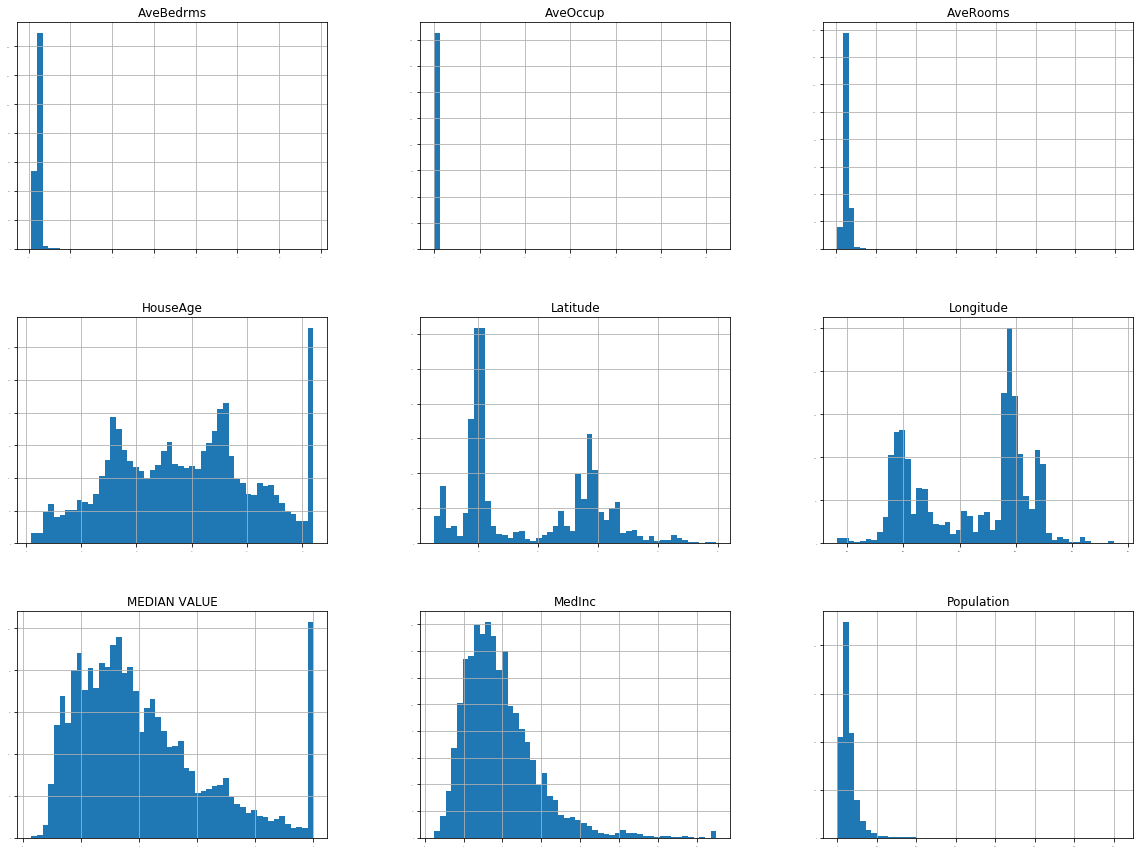

Skew for HOUSE AGE is: 0.0603306375991
Skew for MedInc is: 1.64665670213
Skewness after transformation of MedInc -0.146081811577


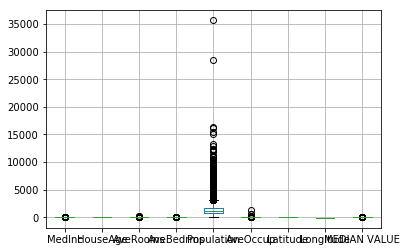

                MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  \
MedInc        1.000000 -0.139192  0.314303  -0.069967    0.032068  0.011397   
HouseAge     -0.139192  1.000000 -0.153277  -0.077747   -0.296244  0.013191   
AveRooms      0.314303 -0.153277  1.000000   0.847621   -0.072213 -0.004852   
AveBedrms    -0.069967 -0.077747  0.847621   1.000000   -0.066197 -0.006181   
Population    0.032068 -0.296244 -0.072213  -0.066197    1.000000  0.069863   
AveOccup      0.011397  0.013191 -0.004852  -0.006181    0.069863  1.000000   
Latitude     -0.085359  0.011173  0.106389   0.069721   -0.108785  0.002366   
Longitude    -0.015142 -0.108197 -0.027540   0.013344    0.099773  0.002476   
MEDIAN VALUE  0.651807  0.105623  0.151948  -0.046701   -0.024650 -0.023737   

              Latitude  Longitude  MEDIAN VALUE  
MedInc       -0.085359  -0.015142      0.651807  
HouseAge      0.011173  -0.108197      0.105623  
AveRooms      0.106389  -0.027540      0.151948  
AveBedrms

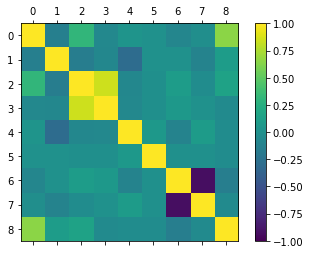

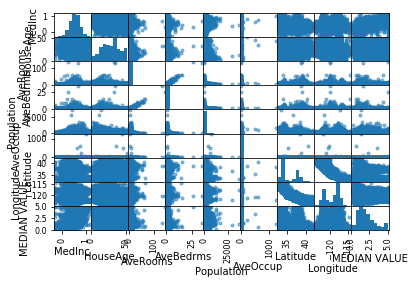

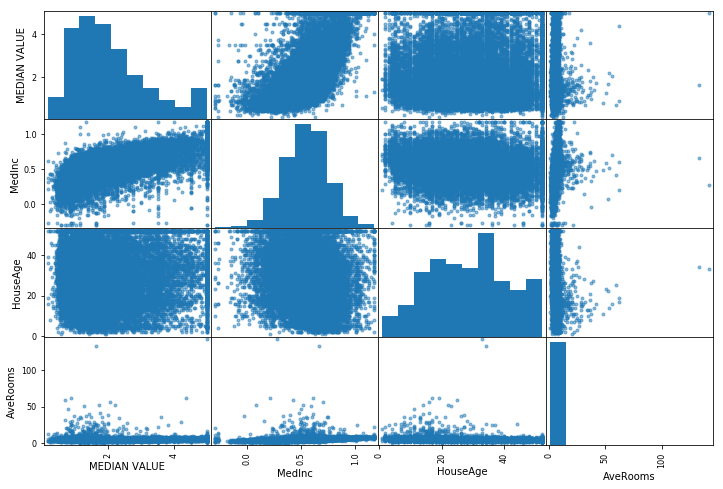

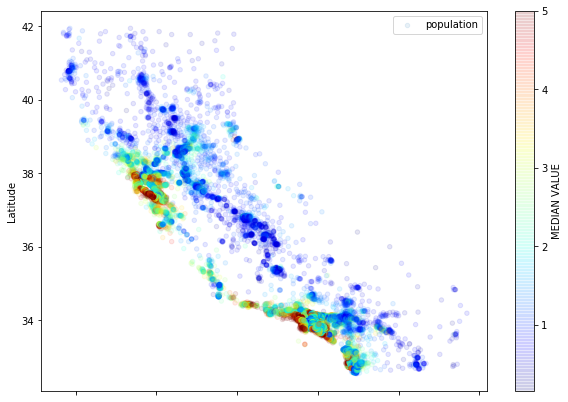

(14448, 9)
(6192, 9)
[  3.68469656e+00   1.04285898e-02  -6.79275584e-02   5.30224224e-01
  -1.35268133e-05  -3.48782465e-03  -4.42914404e-01  -4.55277301e-01]
Linear Regression RMSE :  0.785560268099
[  0.00000000e+00   3.58757161e-03   0.00000000e+00  -0.00000000e+00
  -1.08602124e-05  -0.00000000e+00  -0.00000000e+00  -0.00000000e+00]
LASSO :  1.14644707656
[  0.00000000e+00   7.02596111e-03   0.00000000e+00  -0.00000000e+00
  -6.03860364e-08  -0.00000000e+00  -0.00000000e+00  -0.00000000e+00]
Elastic Net :  1.14507813687


In [19]:
import pandas as pd

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeClassifier

from sklearn.linear_model import ElasticNet
from sklearn import svm
from sklearn.metrics import mean_squared_error

filename='C:\\Users\\akoguab\\Desktop\\R and D\\Data science\\data set\\carlifornia.csv'
#names= ['preg', 'plas', 'pres', 'skin', 'test','mass', 'pedi','age','class']

dataset=pd.read_csv(filename)

dataset.head(20)

import matplotlib.pyplot as plt 

dataset.hist(bins=50,figsize=(20,15), xlabelsize=1, ylabelsize=1)
plt.show()

print ("Skew for HOUSE AGE is:", dataset.HouseAge.skew())

print ("Skew for MedInc is:", dataset.MedInc.skew())

# Log Transform the age variable for skewness
import numpy as np
dataset.MedInc = np.log10(dataset.MedInc)

print("Skewness after transformation of MedInc",dataset.MedInc.skew())

# Box Plots

dataset.boxplot(ax=None, return_type='axes')
plt.show()

# Correlation

print(dataset.corr())

#Correlation Matrix Plot

fig = plt.figure() 
ax = fig.add_subplot(111) 
cax = ax.matshow(dataset.corr(), vmin=-1, vmax=1, interpolation='none') 
fig.colorbar(cax) 
plt.show()


#Scatter Plot Matrix


pd.scatter_matrix(dataset)
plt.show()

# Create scatter plots based on lat/long

# scatter matrix on some attributes

from pandas.tools.plotting import scatter_matrix

atrributes=["MEDIAN VALUE","MedInc","HouseAge","AveRooms"]
scatter_matrix(dataset[atrributes], figsize=(12,8))

dataset.plot(kind="scatter", x="Longitude",y="Latitude",alpha=0.1, label="population",figsize=(10,7),c="MEDIAN VALUE", cmap=plt.get_cmap("jet"),colorbar=True,)
plt.show()




# Split into training and validation and fit Logistic Regression

from sklearn.model_selection import train_test_split

    # Generate the training set.  Set random_state to be able to replicate results.

train = dataset.sample(frac=0.7, random_state=1)

# Select anything not in the training set and put it in the testing/validation set.

test = dataset.loc[~dataset.index.isin(train.index)]
# Print the shapes of both sets.
print(train.shape)
print(test.shape)

# Get all the columns from the dataframe for the training data.
columnsTrain= train.columns.tolist()
columnsTrain=columnsTrain[0:8]

columnsTest= test.columns.tolist()
columnsTest=columnsTest[0:8]

target= 'MEDIAN VALUE'


# Fit Linear Regression

model = LinearRegression ()
# Fit the model to the training data.
model.fit(train[columnsTrain], train[target])

print(model.coef_)

# Make predictions on the training data

predictions_train = model.predict(train[columnsTrain])
predictions_test = model.predict(test[columnsTest])

#Print root mean square error
mse_train = mean_squared_error(predictions_test,test[target])


print("Linear Regression RMSE : ",mse_train**0.5)



# Fit LASSO Regression

model = Lasso ()

# Fit the model to the training data.
model.fit(train[columnsTrain], train[target])

print(model.coef_)

# Make predictions on the training data

predictions_train = model.predict(train[columnsTrain])
predictions_test = model.predict(test[columnsTest])

#Print root mean square error
mse_train = mean_squared_error(predictions_test,test[target])


print("LASSO : ",mse_train**0.5)


# Fit Elastic Net Regression on training data

model = ElasticNet ()

# Fit the model to the training data.
model.fit(train[columnsTrain], train[target])

print(model.coef_)

# Make predictions on the training data



predictions_train = model.predict(train[columnsTrain])

predictions_test = model.predict(test[columnsTest])

#Print root mean square error
mse_train = mean_squared_error(predictions_test,test[target])


print("Elastic Net : ",mse_train**0.5)






